# Actividad 5
# Sebastián Hernández Mantilla

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv(r'C:\Users\Sebastian Hernandez\Especializacion\Semestre2\Decisiones_incertidumbre\practicas\Actividad5\datos_horas_conexion.csv',';')
df.head()

,id_usuario,Calificadora,Correo,Fecha Consulta,Estado usuario
0,c2290d89dfc4,Buró de Crédito,gmail.com,19/01/21 9:20,ACTIVO
1,8d24ef1d52d8,Buró de Crédito,gmail.com,19/01/21 8:28,ACTIVO
2,a5120d2c47fa,Buró de Crédito,gmail.com,17/01/21 13:36,ACTIVO
3,5a5d70893606,Buró de Crédito,edubc.mx,20/01/21 9:27,ACTIVO
4,4a2082948031,Buró de Crédito,gmail.com,21/01/21 14:26,ACTIVO


In [34]:
df.describe()

,id_usuario,Calificadora,Correo,Fecha Consulta,Estado usuario
count,4022,4022,4003,4022,4003
unique,3681,1,93,3442,3
top,fdcc844fb3b0,Buró de Crédito,gmail.com,21/01/21 20:24,ACTIVO
freq,66,4022,2812,4,3602


In [35]:
df.dropna(inplace=True)

##### La columna 'Calificadora' es siempre igual y no aporta información 

In [36]:
df['Calificadora'].value_counts()

Buró de Crédito    4003
Name: Calificadora, dtype: int64

In [37]:
df['Calificadora'].unique()

array(['Buró de Crédito'], dtype=object)

##### En la columna ' Correo' la gran mayoría son gmail y hotmail 

In [38]:
df['Correo'].unique() #Existen muchos registros escritos mal

array(['gmail.com', 'edubc.mx', 'oitlook.com', 'hotmail.com',
       'hotmail.es', 'outlook.com', 'gmail.comma', 'yahoo.com.mx',
       'gmail.Com', 'me.com', 'live.com.mx', 'gmail.com.mx',
       'ittepic.edu.mx', 'sohe95.com', 'multiva.com.mx', 'hotmai.com',
       'avantservices.com.mx', 'icloud.com', 'yahoo.com', 'live.com',
       'liverpool.com.mx', 'gmeil.com', 'GMAIL.COM', 'telefonica.com',
       'msn.com', 'gmail.comlaura', 'outlook.con', 'outlook.es',
       'hotmil.com', 'mail.ru', 'hormail.com', 'hotmail.comRICARDO',
       'g2telecom.com.mx', 'hotmail.con', 'hotmail.com.mx', 'gmail.con',
       'mail.com', 'mx.ey.com', 'saetowers.com.mx', '5675gmail.com',
       'tec.mx', 'gmail.comsagrario', 'hotmaol.com', 'gotmail.com',
       'yomax.com.mx', 'suramexico.com', 'g.conai.com', 'hitmail.com',
       'g.mail.com.mx', 'exatec.tec.mx', 'jotmail.com', 'gitsmfg.com',
       'sermatel.mx', 'prodigy.net.mx', 'outlook.coma', 'gmal.com',
       'gmai.com', '13gmail.com', 'g.mai.com

<BarContainer object of 13 artists>

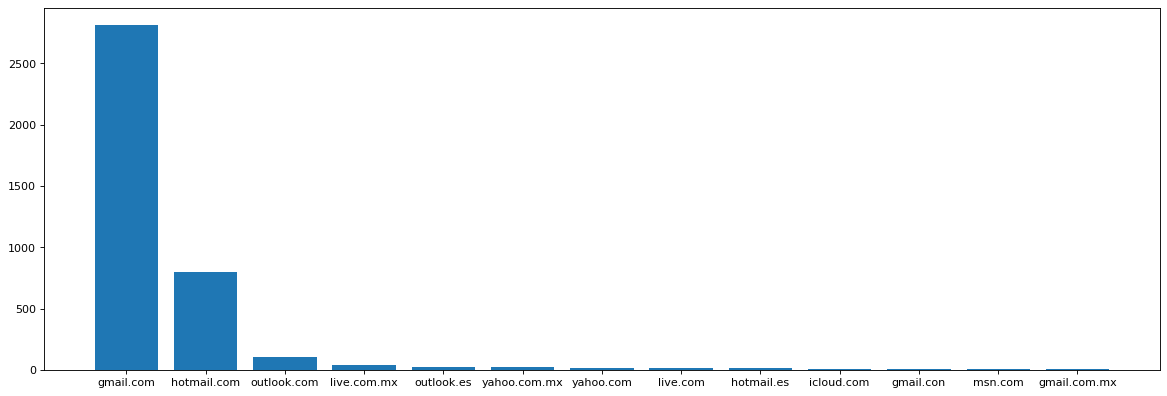

In [53]:
#Se toman solo los registros repetidos mas de 5 veces para la gráfica
x = df['Correo'].value_counts()
x = x > 5
y = df['Correo'].value_counts()[x]

plt.figure(figsize=(18, 6), dpi=80)
plt.bar(y.index,y)

##### Para el análisis de la hora se dividio el campo de 'Fecha Consulta' en año, mes, día y hora y se dividió la hora en 6 grupos 

In [40]:
from datetime import datetime


df['Fecha Consulta'] = df['Fecha Consulta'].apply(lambda x: datetime.strptime(x, "%d/%m/%y %H:%M") )

df['ano'] = df['Fecha Consulta'].apply(lambda x: x.year)
df['mes'] = df['Fecha Consulta'].apply(lambda x: x.month)
df['dia'] = df['Fecha Consulta'].apply(lambda x: x.day)

df['hora'] = df['Fecha Consulta'].apply(lambda x: x.hour)

In [41]:
df

,id_usuario,Calificadora,Correo,Fecha Consulta,Estado usuario,ano,mes,dia,hora
0,c2290d89dfc4,Buró de Crédito,gmail.com,2021-01-19 09:20:00,ACTIVO,2021,1,19,9
1,8d24ef1d52d8,Buró de Crédito,gmail.com,2021-01-19 08:28:00,ACTIVO,2021,1,19,8
2,a5120d2c47fa,Buró de Crédito,gmail.com,2021-01-17 13:36:00,ACTIVO,2021,1,17,13
3,5a5d70893606,Buró de Crédito,edubc.mx,2021-01-20 09:27:00,ACTIVO,2021,1,20,9
4,4a2082948031,Buró de Crédito,gmail.com,2021-01-21 14:26:00,ACTIVO,2021,1,21,14
...,...,...,...,...,...,...,...,...,...
4017,a7b8edae9a16,Buró de Crédito,gmail.com,2021-01-06 11:10:00,SIN VALIDAR,2021,1,6,11
4018,4b636433f200,Buró de Crédito,gmail.com,2021-01-06 14:54:00,SIN VALIDAR,2021,1,6,14
4019,4b636433f200,Buró de Crédito,gmail.com,2021-01-06 23:43:00,SIN VALIDAR,2021,1,6,23
4020,a7b8edae9a16,Buró de Crédito,gmail.com,2021-01-06 21:21:00,SIN VALIDAR,2021,1,6,21


In [44]:
df['hora1'] = df['hora'].apply(lambda x : '0-4' if ( 0 <= x < 4) else ( '4-8' if ( 4 <= x < 8) else ('8-12' if (8 <= x <12) else ('12-16' if (12 <= x < 16) else('16-20' if (16 <= x <20) else ('20-24'))))))

In [50]:
df['hora1'] = df['hora'].apply(lambda x : '0-2' if ( 0 <= x < 2) else ( '2-4' if ( 2 <= x < 4) else ('4-6' if (4 <= x <6) else ('6-8' if (6 <= x < 8) else('8-10' if (8 <= x <10) else('10-12' if(10 <= x < 12) else('12-14' if(12 <= x < 14) else('14-16' if(14 <=x < 16) else('16-18' if(16<=x<18) else('18-20' if(18<=x<20) else('20-22' if(20<=x<22) else('22-24')) )))) ) )))))

In [51]:
df['hora1'].unique()

array(['8-10', '12-14', '14-16', '16-18', '22-24', '10-12', '2-4',
       '18-20', '20-22', '0-2', '6-8', '4-6'], dtype=object)

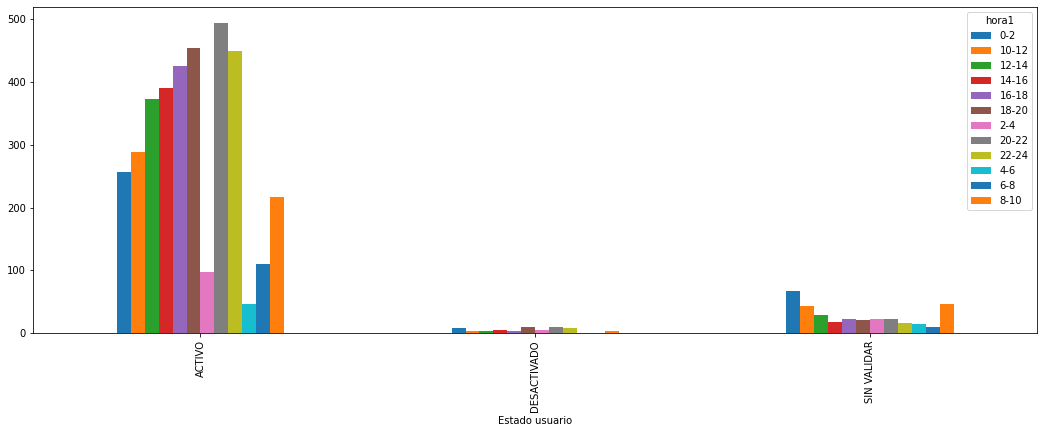

In [52]:
#GRÁFICA PARA CONOCER LA DISTRIBUCIÓN DE HORAS 
df.groupby(['hora1'])['Estado usuario'].value_counts().unstack(0).plot.bar(figsize=(18,6))
#df.groupby('year').case_status.value_counts().unstack(0).plot.barh()

In [ ]:

df['hora'] = df['hora1']

df_ = df.groupby('Estado usuario')['hora'].count()
df_

Estado usuario
ACTIVO         3602
DESACTIVADO      67
SIN VALIDAR     334
Name: hora, dtype: int64

##### De la última gráfica se ve que la mayor cantidad de usuarios que estan activos hicieron su consulta en las horas de la noche, de las 20 a las 24 horas. Dado que las otras columnas de la data no tienen mucha varianza y, por lo tanto no ofrecen información relevante, se considera que solo con el análisis de la hora de consulta se puede responder a la pregunta planteada: se recomienda configurar las horas de la pauta digital para el rango entre las 16 y las 24 horas